In [1]:
import pandas as pd 
import gensim
import re
import math
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Users.csv')

In [3]:
df.head()

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId
0,-1,1,2014-05-13T21:29:22.820,Community,2014-05-13T21:29:22.820,http://meta.stackexchange.com/,on the server farm,"<p>Hi, I'm not really a person.</p>\n\n<p>I'm ...",0,798,1325,-1.0
1,1,101,2014-05-13T22:58:54.810,Adam Lear,2019-06-11T19:12:27.157,NaN,"New York, NY",\n\n<p>Developer at Stack Overflow focusing on...,453,0,0,37099.0
2,2,101,2014-05-13T22:59:19.787,Geoff Dalgas,2017-12-19T18:52:19.423,http://stackoverflow.com,"Corvallis, OR",<p>Developer on the Stack Overflow team. Find...,9,0,0,2.0
3,3,101,2014-05-13T23:15:34.483,hichris123,2019-08-01T18:06:24.597,NaN,NaN,<p>I'm a student interested in technology.</p>...,7,1,3,3046327.0
4,4,101,2014-05-13T23:16:09.937,Ben Collins,2014-08-04T15:25:54.810,http://benjamincollins.com,Republic of Texas,"<p>I work with <a href=""https://olo.com"" rel=""...",9,0,0,2365.0


In [4]:
df1 = pd.read_csv('Posts.csv')

In [5]:
df1.head(5)

,Id,PostTypeId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate
0,5,1,2014-05-13T23:58:30.457,8,604.0,<p>I've always been interested in machine lear...,5.0,2014-05-14T00:36:31.077,How can I do simple machine learning without h...,<machine-learning>,1.0,1,1.0,2014-05-14T14:40:25.950
1,7,1,2014-05-14T00:11:06.457,4,426.0,"<p>As a researcher and instructor, I'm looking...",36.0,2014-05-16T13:45:00.237,What open-source books (or other materials) pr...,<education><open-source>,3.0,4,1.0,2014-05-14T08:40:54.950
2,9,2,2014-05-14T00:36:31.077,5,NaN,"<p>Not sure if this fits the scope of this SE,...",51.0,2014-05-14T00:36:31.077,NaN,NaN,NaN,0,NaN,NaN
3,10,2,2014-05-14T00:53:43.273,12,NaN,"<p>One book that's freely available is ""The El...",22.0,2014-05-14T00:53:43.273,NaN,NaN,NaN,1,NaN,NaN
4,14,1,2014-05-14T01:25:59.677,23,1495.0,<p>I am sure data science as will be discussed...,66.0,2014-06-20T17:36:05.023,Is Data Science the Same as Data Mining?,<data-mining><definitions>,4.0,1,6.0,NaN


In [6]:
df1 = df1.dropna(subset=['Tags'])

In [7]:
df1.head(5)

,Id,PostTypeId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate
0,5,1,2014-05-13T23:58:30.457,8,604.0,<p>I've always been interested in machine lear...,5.0,2014-05-14T00:36:31.077,How can I do simple machine learning without h...,<machine-learning>,1.0,1,1.0,2014-05-14T14:40:25.950
1,7,1,2014-05-14T00:11:06.457,4,426.0,"<p>As a researcher and instructor, I'm looking...",36.0,2014-05-16T13:45:00.237,What open-source books (or other materials) pr...,<education><open-source>,3.0,4,1.0,2014-05-14T08:40:54.950
4,14,1,2014-05-14T01:25:59.677,23,1495.0,<p>I am sure data science as will be discussed...,66.0,2014-06-20T17:36:05.023,Is Data Science the Same as Data Mining?,<data-mining><definitions>,4.0,1,6.0,NaN
5,15,1,2014-05-14T01:41:23.110,2,620.0,<p>In which situations would one system be pre...,64.0,2014-05-14T01:41:23.110,What are the advantages and disadvantages of S...,<databases>,0.0,1,NaN,2014-05-14T07:41:49.437
6,16,1,2014-05-14T01:57:56.880,18,345.0,"<p>I use <a href=""http://www.csie.ntu.edu.tw/~...",63.0,2014-05-17T16:24:14.523,Use liblinear on big data for semantic analysis,<machine-learning><bigdata><libsvm>,2.0,0,NaN,NaN


In [8]:
df2 = df1.groupby('OwnerUserId')['Tags'].apply(list).reset_index()

In [9]:
df2[:20]

,OwnerUserId,Tags
0,5.0,[<machine-learning>]
1,11.0,[<machine-learning><time-series><data-science-...
2,26.0,"[<algorithms>, <neural-network><image-classifi..."
3,34.0,[<deep-learning><reinforcement-learning><corre...
4,36.0,"[<education><open-source>, <bigdata><clusterin..."
5,62.0,[<visualization>]
6,63.0,[<machine-learning><bigdata><libsvm>]
7,64.0,[<databases>]
8,66.0,"[<data-mining><definitions>, <nlp><stanford-nlp>]"
9,71.0,[<recommender-system>]


In [10]:
#join all tags of a user in a sentence 
usertags = []
for i, j in df2.iterrows(): 
    uniqueTags = ''.join(j['Tags'])
    uniqueTags = re.findall("<(.*?)>", uniqueTags)
    uniqueTags = ' '.join(uniqueTags)
    df2.at[i,'Tags'] = uniqueTags

In [11]:
# df2.head()
# df2 = df2[:20]

In [12]:
#another approach

In [13]:
#TF-IDF vector
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,1))
# vectorizer

In [14]:
# calculate the feature matrix
feature_matrix = vectorizer.fit_transform(df2['Tags']).astype(float)

# display the shape of feature matrix
print(feature_matrix.shape)
print(len(feature_matrix.toarray()))


(10531, 530)
10531


In [15]:
from itertools import compress 
from itertools import combinations
  
# initializing list   
owner_list = df2['OwnerUserId']

flag = {} # to store actual owner values
for i, v in enumerate(owner_list):
    flag[i] = int(owner_list[i])

pairs = []
# create a list of tuples
pairs = list(combinations(flag, 2))
len(pairs)
flag

{0: 5,
 1: 11,
 2: 26,
 3: 34,
 4: 36,
 5: 62,
 6: 63,
 7: 64,
 8: 66,
 9: 71,
 10: 75,
 11: 77,
 12: 82,
 13: 84,
 14: 88,
 15: 95,
 16: 96,
 17: 97,
 18: 102,
 19: 109,
 20: 113,
 21: 116,
 22: 118,
 23: 122,
 24: 131,
 25: 133,
 26: 134,
 27: 136,
 28: 141,
 29: 151,
 30: 156,
 31: 157,
 32: 158,
 33: 173,
 34: 177,
 35: 179,
 36: 189,
 37: 192,
 38: 194,
 39: 199,
 40: 200,
 41: 201,
 42: 212,
 43: 226,
 44: 227,
 45: 229,
 46: 236,
 47: 237,
 48: 245,
 49: 249,
 50: 250,
 51: 273,
 52: 275,
 53: 289,
 54: 295,
 55: 303,
 56: 322,
 57: 339,
 58: 366,
 59: 375,
 60: 378,
 61: 386,
 62: 387,
 63: 403,
 64: 413,
 65: 418,
 66: 426,
 67: 434,
 68: 454,
 69: 456,
 70: 464,
 71: 474,
 72: 496,
 73: 497,
 74: 531,
 75: 534,
 76: 543,
 77: 554,
 78: 555,
 79: 560,
 80: 562,
 81: 588,
 82: 645,
 83: 663,
 84: 676,
 85: 684,
 86: 690,
 87: 691,
 88: 713,
 89: 714,
 90: 721,
 91: 723,
 92: 725,
 93: 728,
 94: 754,
 95: 776,
 96: 791,
 97: 793,
 98: 802,
 99: 807,
 100: 836,
 101: 837,
 102: 8

In [16]:
ids = list(flag.values())
# ids

In [17]:
def compute_cosine_similarity(pair):

    # extract the indexes from the pair
    owner1, owner2 = pair

    # get the feature matrix of the document
    owner1_fm = feature_matrix.toarray()[owner1]
    owner2_fm = feature_matrix.toarray()[owner2]

    # compute cosine similarity
    cosine_similarity = np.dot(owner1_fm, owner2_fm)

    return cosine_similarity

In [18]:
pairwise_cosine_similarity = [compute_cosine_similarity(pair) for pair in pairs]
# create a dataframe
df_similarity = pd.DataFrame({'pair': pairs, 'similarity': pairwise_cosine_similarity})

KeyboardInterrupt: 

In [ ]:
# plot heatmap for 20 or 30 at max not for whole dataset
# we can try plotting the data for rows having top 20 sum of similarity value with each other
def plot_heatmap(df_hm, xlabels, ylabels):
    """
    Given a dataframe containing similarity grid, plot the heatmap
    """
    sns.set(style="white")

    # Set up the matplotlib figure
    # (to enlarge the cells, increase the figure size)
    f, ax = plt.subplots(figsize=(18, 18))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 20, as_cmap=True)

    # Generate a mask for the upper triangle
    mask = np.zeros_like(df_hm, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(df_hm, mask=mask, cmap=cmap, center=0.5,
            xticklabels=xlabels, yticklabels=ylabels,
            square=True, linewidths=.5, fmt='.2f',
            annot=True, cbar_kws={"shrink": .5}, vmax=1)

    ax.set_title("Heatmap of similar users").set_fontsize(15)
    ax.set_xlabel("")
    ax.set_ylabel("")

    return ax

In [ ]:
# initialize an empty dataframe grid
length_users = len(df2['OwnerUserId'])
df_hm = pd.DataFrame({'ind': range(length_users), 'cols': range(length_users), 'vals': pd.Series(np.zeros(length_users))})

# convert to a matrix
df_hm = df_hm.pivot(index='ind', columns='cols').fillna(0)

# make a copy
df_temp = df_similarity.copy()

# convert list of tuples into 2 lists
list1 = []
list2 = []
for item1, item2 in df_temp.pair:
    list1.append(item1)
    list2.append(item2)

# add two columns to df_temp
df_temp['owner1'] = list1
df_temp['owner2'] = list2

# drop the pair as it not needed
df_temp.drop('pair', axis=1, inplace=True)

# create tuples (0, 1, similarity)
df_temp['pairs'] = list(zip(df_temp.owner1, df_temp.owner2, round(df_temp.similarity, 2)))

# to get lower diagnol, swap the rows and cols.
for row, col, similarity in df_temp.pairs:
    df_hm.iloc[col, row] = similarity

In [ ]:
df_hm

In [ ]:
# for most and least similar users but user id have to be mapped with "flag"
df_similarity.loc[[df_similarity.similarity.values.argmax(), df_similarity.similarity.values.argmin()]]

In [ ]:
# length = len(df_hm)
user_connections = {}
for index, row in df_hm.iterrows():
    user_connections[index] = {}
    pair1 = flag[index]
    user_connections[index][0] = pair1
    weak = []
    strong = []
    counter = 0
    for x in row:
        if(counter != index):
            pair2 = flag[counter]
            if(x >0.1):
                strong.append(pair2)
            else:
                weak.append(pair2)
        counter +=1
    user_connections[index][1] = strong
    user_connections[index][2] = weak
# user_connections

In [ ]:
outdata = pd.DataFrame.from_dict(user_connections,orient='index')

In [ ]:
# outdata

In [ ]:
outdata.to_csv (r'userConnections.csv', index = None, header=True)

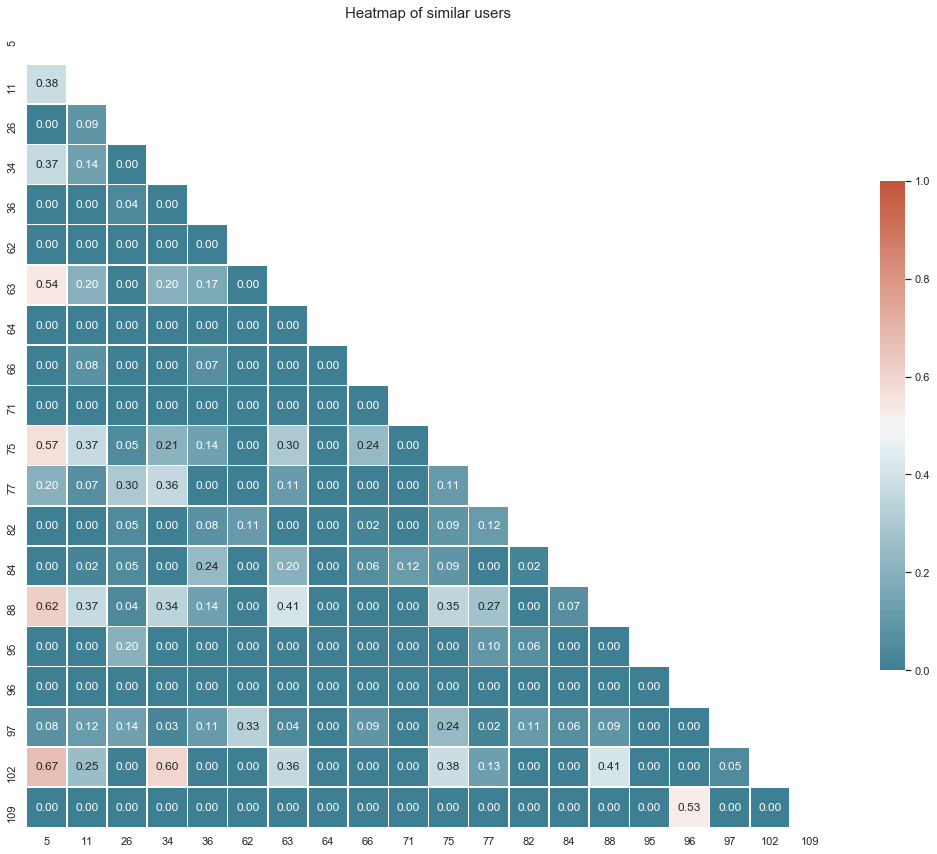

In [29]:
ax = plot_heatmap(df_hm, ids, ids)